In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
## load and preprocess data

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [5]:
max_features = 10000
maxlen = 500
batch_size = 32

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=maxlen)

In [7]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [8]:
print('Pad sequences (samples x time)')

Pad sequences (samples x time)


In [9]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [10]:
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [12]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])



In [13]:
history = model.fit(X_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.6161 - acc: 0.6867 - val_loss: 0.4786 - val_acc: 0.7920
Epoch 2/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.4685 - acc: 0.7887 - val_loss: 0.4066 - val_acc: 0.8234
Epoch 3/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.4235 - acc: 0.8143 - val_loss: 0.5092 - val_acc: 0.7816
Epoch 4/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4052 - acc: 0.8224 - val_loss: 0.4073 - val_acc: 0.8152
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3944 - acc: 0.8306 - val_loss: 0.4265 - val_acc: 0.8086
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3786 - acc: 0.8363 - val_loss: 0.4701 - val_acc: 0.7766
Epoch 7/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.3731 - acc: 0.8390 - val_loss: 0.5204 - val_acc:

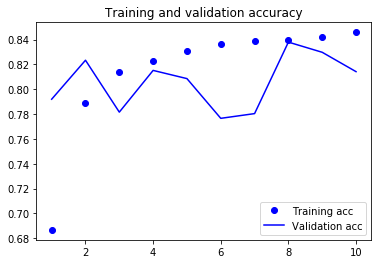

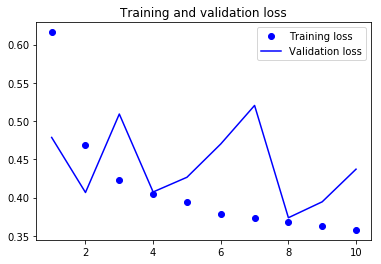

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()